# **Chapter 4** *Data Scraping*



In [93]:
!pip install snscrape
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 4.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [95]:
searchs = ['ETLE near:"indonesia"', 'tilang manual near:"indonesia"']
tweets = []
 
tweetLimit = 1000
for search in searchs:
  for tweet in sntwitter.TwitterSearchScraper(search).get_items():
      if len(tweets) == tweetLimit:
          break
      else:
          tweets.append([tweet.date, tweet.username, tweet.content])
tweetsDF = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
tweetsDF.head()

<ipython-input-95-8f0c1bc780e0>:10: DeprecatedFeatureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content])
<ipython-input-95-8f0c1bc780e0>:10: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.username, tweet.content])


,Date,User,Tweet
0,2023-03-22 05:37:30+00:00,lqmnl,Tilang konvesional &gt;&gt;&gt; ETLE
1,2023-03-22 04:41:43+00:00,RTMCRiau,Pemantauan arus lalu lintas Kota Pekanbaru mel...
2,2023-03-21 07:25:30+00:00,Indopolitika,"Untuk Kedua Kalinya, Gubernur Sumsel Herman De..."
3,2023-03-21 05:40:22+00:00,TMCPoldaMetro,12.39 Polri Team Etle Mobile Sat Pamwal Dit La...
4,2023-03-21 04:11:49+00:00,TMCPoldaMetro,11.11 #Polri Unit Kamsel Sat Lantas Jaktim mem...


# **Chapter 5** *Preprocessing Data*

In [96]:
!pip install translators --upgrade
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [97]:
import nltk
import re 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import translators as ts
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import seaborn as sns
from collections import Counter
from textblob import TextBlob
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib as mpl
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.preprocessing import StandardScaler

In [98]:
tweetsDF['translate'] = tweetsDF['Tweet'].apply(lambda x : ts.translate_text(x, translator='google'))
tweetsDF.head()

,Date,User,Tweet,translate
0,2023-03-22 05:37:30+00:00,lqmnl,Tilang konvesional &gt;&gt;&gt; ETLE,Tilang konvesional &gt;&gt;&gt; ETLE
1,2023-03-22 04:41:43+00:00,RTMCRiau,Pemantauan arus lalu lintas Kota Pekanbaru mel...,Pekanbaru City Traffic Monitoring through CCTV...
2,2023-03-21 07:25:30+00:00,Indopolitika,"Untuk Kedua Kalinya, Gubernur Sumsel Herman De...","For the second time, South Sumatra Governor He..."
3,2023-03-21 05:40:22+00:00,TMCPoldaMetro,12.39 Polri Team Etle Mobile Sat Pamwal Dit La...,12.39 POLRI TEAM ETLE MOBILE SAT PAMWAL DIT LA...
4,2023-03-21 04:11:49+00:00,TMCPoldaMetro,11.11 #Polri Unit Kamsel Sat Lantas Jaktim mem...,11.11 #Polri Kamsel Sat Lantas Jaktim Unit pro...


In [99]:
def pre_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    tweet = re.sub('https', ' ', tweet)
    tweet = re.sub('@[^\s]+',' ',tweet)
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = tweet.strip('\'"')
    return tweet

In [100]:
tweetsDF['translate'].replace(regex=True, to_replace=['ð'], value='', inplace=True)

In [101]:
tweetsDF['translate'] = tweetsDF['translate'].apply(lambda x : pre_processing(x))
tweetsDF.head()

,Date,User,Tweet,translate
0,2023-03-22 05:37:30+00:00,lqmnl,Tilang konvesional &gt;&gt;&gt; ETLE,tilang konvesional gtgtgt etle
1,2023-03-22 04:41:43+00:00,RTMCRiau,Pemantauan arus lalu lintas Kota Pekanbaru mel...,pekanbaru city traffic monitoring through cctv...
2,2023-03-21 07:25:30+00:00,Indopolitika,"Untuk Kedua Kalinya, Gubernur Sumsel Herman De...",for the second time south sumatra governor her...
3,2023-03-21 05:40:22+00:00,TMCPoldaMetro,12.39 Polri Team Etle Mobile Sat Pamwal Dit La...,1239 polri team etle mobile sat pamwal dit lan...
4,2023-03-21 04:11:49+00:00,TMCPoldaMetro,11.11 #Polri Unit Kamsel Sat Lantas Jaktim mem...,1111 polri kamsel sat lantas jaktim unit provi...


max Tweet_content len: 64


<ipython-input-102-a052f01b1586>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Tweet_content_len)


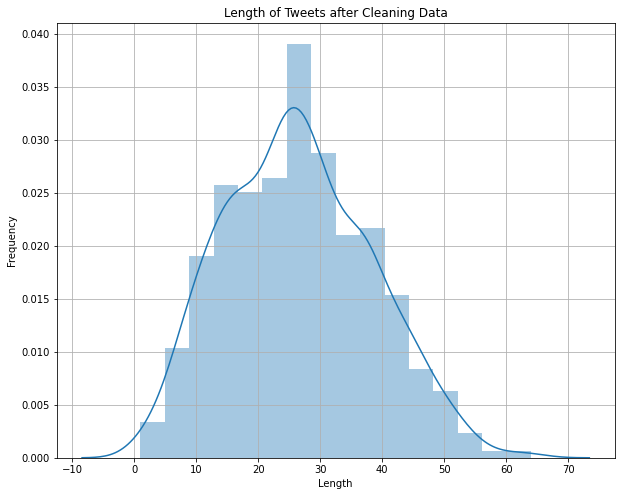

In [102]:
Tweet_content_len = tweetsDF['translate'].apply(lambda p: len(p.split(' ')))
max_Tweet_content_len = Tweet_content_len.max()
print('max Tweet_content len: {0}'.format(max_Tweet_content_len))
plt.figure(figsize = (10, 8))
sns.distplot(Tweet_content_len)
plt.title('Length Distribution of Tweets')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Length of Tweets after Cleaning Data')
plt.grid()

In [103]:
english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split()  if word not in english_stop_words]))
    return removed_stop_words

In [104]:
no_stop_words_tweet = remove_stop_words(tweetsDF['translate'])
no_stop_words_tweet

['tilang konvesional gtgtgt etle',
 'pekanbaru city traffic monitoring cctv rtmc ethle amp sweet talam precision rtmc ditlantas riau police room tuesday 321 night stopparagaragistopkelelasisama humanity humanity',
 'second time south sumatra governor herman deru rewarded etle award via',
 '1239 polri team etle mobile sat pamwal dit landas pmj enforcement r2 amp r4 crosses transjakarta amp opponents current around south jakarta green permata lets cultivate orderly traffic self safety motorists',
 '1111 polri kamsel sat lantas jaktim unit provides traffic safety counseling pick drivers explanations etle tickets masks pangkalan pick upl jl raya bekasi timur pulo gadung jaktim',
 'pekanbaru city traffic monitoring cctv rtmc ethle amp sweet talam precision rtmc ditlantas riau police room monday 320 night stopparagaragistopkelelasisama humanity humanity',
 '0955 polri team etle mobile sat lantas jakarta enforcement motorcycle riders crossed fast lane jl ahmad yani cempaka putih central jakar

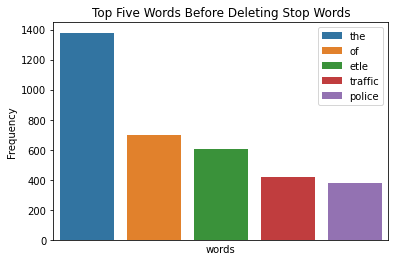

In [105]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(tweetsDF['translate'], 5)
df1 = pd.DataFrame(common_words, columns = ['translate' , 'count'])
# df1.groupby('translate').sum()['count'].sort_values(ascending=False).plot(
#     kind='bar', title='Top 10 words in tweet before removing stop words',fc='orange')
sns.barplot(x='translate', y='count', data=df1, hue='translate', dodge=False)
plt.title('Top Five Words Before Deleting Stop Words')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('words')
plt.ylabel('Frequency')
plt.legend(loc=1)

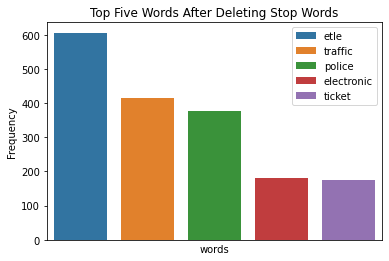

In [106]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(tweetsDF['translate'], 5)
df2 = pd.DataFrame(common_words, columns = ['translate' , 'count'])
# df2.groupby('translate').sum()['count'].sort_values(ascending=False).plot(
#     kind='bar', title='10 kata teratas setelah proses remove stopword',fc='rgbkymc')
sns.barplot(x='translate', y='count', data=df2, hue='translate',dodge=False)
plt.title('Top Five Words After Deleting Stop Words')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('words')
plt.ylabel('Frequency')
plt.legend(loc=1)

In [107]:
def get_lemmatize_text(corpus):
  lemmatizer = WordNetLemmatizer()
  return [' '.join([lemmatizer.lemmatize(word) for word in tweet.split()]) for tweet in corpus]

In [108]:
tweetsDF['translate'] = get_lemmatize_text(no_stop_words_tweet)
tweetsDF.head()

,Date,User,Tweet,translate
0,2023-03-22 05:37:30+00:00,lqmnl,Tilang konvesional &gt;&gt;&gt; ETLE,tilang konvesional gtgtgt etle
1,2023-03-22 04:41:43+00:00,RTMCRiau,Pemantauan arus lalu lintas Kota Pekanbaru mel...,pekanbaru city traffic monitoring cctv rtmc et...
2,2023-03-21 07:25:30+00:00,Indopolitika,"Untuk Kedua Kalinya, Gubernur Sumsel Herman De...",second time south sumatra governor herman deru...
3,2023-03-21 05:40:22+00:00,TMCPoldaMetro,12.39 Polri Team Etle Mobile Sat Pamwal Dit La...,1239 polri team etle mobile sat pamwal dit lan...
4,2023-03-21 04:11:49+00:00,TMCPoldaMetro,11.11 #Polri Unit Kamsel Sat Lantas Jaktim mem...,1111 polri kamsel sat lantas jaktim unit provi...


In [109]:
#negative 0, positif 1
def generate_sentiment(tweet):
  def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
  def getPolarity(text):
    return TextBlob(text).sentiment.polarity
  tweet['TextBlob_Subjectivity'] = tweet['translate'].apply(getSubjectivity)
  tweet['TextBlob_Polarity'] = tweet['translate'].apply(getPolarity)
  def getAnalysis(score):
    if score < 0:
      return 0
    elif score == 0:
      return 2
    else:
      return 1
  tweet['sentimen'] = tweet['TextBlob_Polarity'].apply(getAnalysis )
  return tweet

In [110]:
generate_sentiment(tweetsDF)
tweetsDF = tweetsDF[tweetsDF['sentimen']!=2]
tweetsDF.head()

,Date,User,Tweet,translate,TextBlob_Subjectivity,TextBlob_Polarity,sentimen
1,2023-03-22 04:41:43+00:00,RTMCRiau,Pemantauan arus lalu lintas Kota Pekanbaru mel...,pekanbaru city traffic monitoring cctv rtmc et...,0.650000,0.350000,1
3,2023-03-21 05:40:22+00:00,TMCPoldaMetro,12.39 Polri Team Etle Mobile Sat Pamwal Dit La...,1239 polri team etle mobile sat pamwal dit lan...,0.233333,-0.066667,0
5,2023-03-21 03:16:22+00:00,RTMCRiau,Pemantauan arus lalu lintas Kota Pekanbaru mel...,pekanbaru city traffic monitoring cctv rtmc et...,0.650000,0.350000,1
6,2023-03-21 02:56:07+00:00,TMCPoldaMetro,09.55 Polri Team Etle Mobile Sat Lantas Jakpus...,0955 polri team etle mobile sat lantas jakarta...,0.362500,0.100000,1
8,2023-03-21 02:28:07+00:00,RTMCRiau,"INFO :\n\nUntuk Pelayanan :\nBPKB, STNK, SIM, ...",info service bpkb stnk sim skukp etle closed 2...,0.100000,-0.100000,0


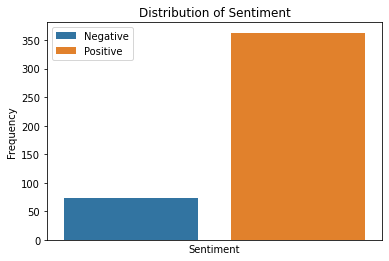

In [111]:
sns.countplot(x=tweetsDF['sentimen'], hue=tweetsDF['sentimen'],dodge=False)
plt.title('Distribution of Sentiment')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Frequency')
plt.xlabel('Sentiment')
plt.legend(labels=["Negative", 'Positive'])

In [112]:
tweetsDF['sentimen'] = tweetsDF['sentimen'].astype('int')
x = tweetsDF['translate']
y = tweetsDF['sentimen']
y = np.array(y)

In [113]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True)
x=tv.fit_transform(x)
print('Tfidf_tweet:',x.shape)

Tfidf_tweet: (436, 1035)


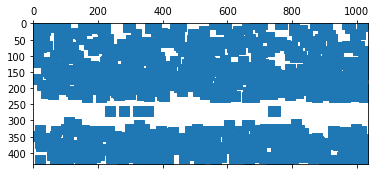

In [114]:
scaler = StandardScaler(with_mean=False)
scaler.fit(x)
x = scaler.transform(x)
plt.spy(x)

In [115]:
over = SMOTE(sampling_strategy=0.6, random_state=8)
under = RandomUnderSampler(sampling_strategy=0.6, random_state=8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_over_under, Y_over_under = pipeline.fit_resample(x, y)
counter = Counter(Y_over_under)
print(counter)

Counter({1: 361, 0: 217})


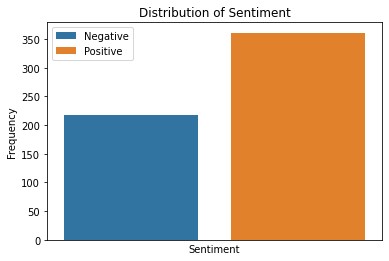

In [116]:
sns.countplot(x=Y_over_under, hue=Y_over_under, hue_order=[0, 1], dodge=False)
plt.title('Distribution of Sentiment')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend(labels=["Negative", "Positive"])

# **Chapter 6** *Modelling*

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [118]:
model = svm.SVC(C=10, gamma=0.1, kernel = 'sigmoid', probability = True)
model.fit(X_over_under, Y_over_under)

SVC(C=10, gamma=0.1, kernel='sigmoid', probability=True)

# **Chapter 7** *Pengujian dan Evaluasi Model*

In [120]:
import matplotlib.patches as mpatches
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix as cm
import matplotlib.ticker as mtick

<ipython-input-121-960df942c622>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(['Akurasi', 'Presisi', 'Recall', 'F1'], handles=[akurasi_label, presisi_label, recall_label, f1_label ], bbox_to_anchor=(1.05, 1))


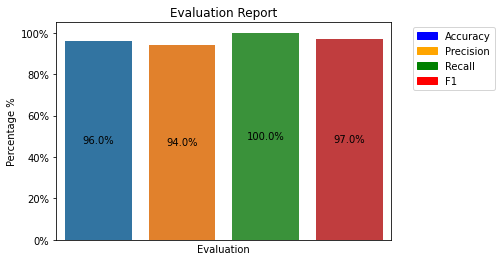

In [121]:
predict = model.predict(X_over_under)
presisi = round(precision_score(Y_over_under, predict),2)
recall = round(recall_score(Y_over_under, predict),2)
f1 = round(f1_score(Y_over_under, predict),2)
akurasi = round(accuracy_score(Y_over_under, predict),2)
kumpulan = {'Akurasi': [akurasi],
        'Presisi': [presisi], 
        'Recall' : [recall], 
        'F1' : [f1]}
height = [akurasi, presisi, recall, f1]
width = ['Akurasi', 'Presisi', 'Recall', 'F1']
sns.barplot(x=width, y=height, hue=width, dodge=False)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for i in range(len(width)):
  plt.text(i, height[i]/2, '{}%'.format(height[i]*100), ha='center', va='center')
plt.title("Evaluation Report")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Percentage %')
plt.xlabel('Evaluation')
akurasi_label = mpatches.Patch(color='blue', label='Accuracy')
presisi_label = mpatches.Patch(color='orange', label='Precision')
recall_label = mpatches.Patch(color='green', label='Recall')
f1_label = mpatches.Patch(color='red', label='F1')
plt.legend(['Akurasi', 'Presisi', 'Recall', 'F1'], handles=[akurasi_label, presisi_label, recall_label, f1_label ], bbox_to_anchor=(1.05, 1))
plt.show()

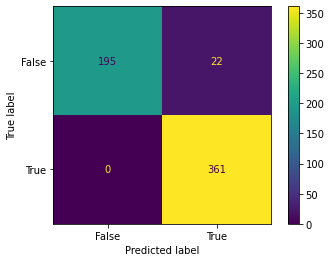

In [122]:
confusion_matrix = cm(Y_over_under, predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

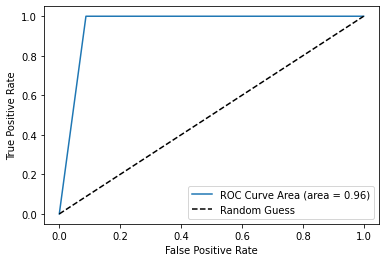

In [123]:
y_pred_proba = model.predict_proba(X_over_under)[::,1]
fpr, tpr, thresholds = roc_curve(Y_over_under, y_pred_proba)
auc = roc_auc_score(Y_over_under, y_pred_proba)

plt.plot(fpr, tpr, label='ROC Curve Area (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()